# Importing Important libraries

In [1]:
%matplotlib inline

In [2]:
import torch

!pip install torchsummary
from torchsummary import summary
! pip install albumentations==0.4.6 -q

# Importing Important custom packages

In [3]:
from data import dataloader, data_details
from train import train_model
from utils import misclassified
from model import Net

# Let's Visualize Training Images details

Files already downloaded and verified


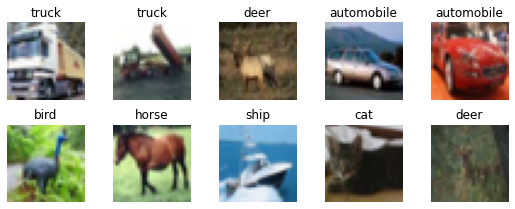

 - mean: [0.49139968 0.48215841 0.44653091]
 - std: [0.24703223 0.24348513 0.26158784]
 - var: [15.56135559 15.11767693 17.44919073]


In [4]:
classes = data_details(cols = 5, rows = 2, train_data = True, transform = False)

# Let's Visualize Test Images details

Files already downloaded and verified


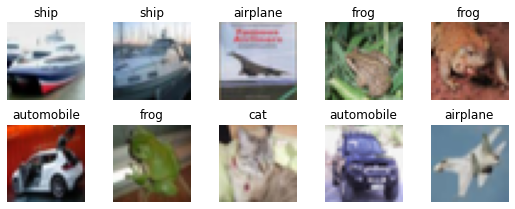

 - mean: [0.49421428 0.48513139 0.45040909]
 - std: [0.24665252 0.24289226 0.26159238]
 - var: [15.51355312 15.04414617 17.44979592]


In [5]:
classes = data_details(cols = 5, rows = 2, train_data = False, transform = False)

# Let's Visualize Training Images details after transformation

Files already downloaded and verified


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

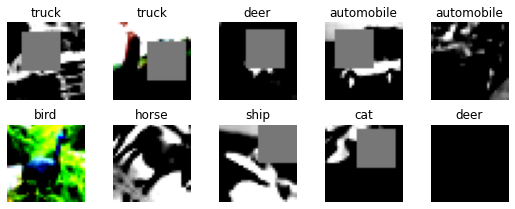

['airplane',
 'automobile',
 'bird',
 'cat',
 'deer',
 'dog',
 'frog',
 'horse',
 'ship',
 'truck']

In [6]:
data_details(cols = 5, rows = 2, train_data = True, transform = True)

# Define cuda device details

In [7]:
SEED = 69
use_cuda = torch.cuda.is_available()

torch.manual_seed(SEED)
if use_cuda:
    torch.cuda.manual_seed(SEED)

device = torch.device("cuda" if use_cuda else "cpu")

# Model Summary

In [8]:
model = Net().to(device)
print("*****Model Summary*****")
summary(model, input_size=(3, 32, 32))

*****Model Summary*****
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 30, 32, 32]             810
              ReLU-2           [-1, 30, 32, 32]               0
       BatchNorm2d-3           [-1, 30, 32, 32]              60
            Conv2d-4           [-1, 30, 32, 32]             270
            Conv2d-5           [-1, 60, 32, 32]           1,800
              ReLU-6           [-1, 60, 32, 32]               0
       BatchNorm2d-7           [-1, 60, 32, 32]             120
            Conv2d-8           [-1, 30, 32, 32]           1,800
            Conv2d-9           [-1, 30, 32, 32]           8,100
             ReLU-10           [-1, 30, 32, 32]               0
      BatchNorm2d-11           [-1, 30, 32, 32]              60
           Conv2d-12           [-1, 30, 32, 32]             270
           Conv2d-13           [-1, 60, 32, 32]           1,800
             Re

# Model Training

Files already downloaded and verified
Files already downloaded and verified


/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))
  0%|          | 0/391 [00:00<?, ?it/s]

*****Training Start*****
EPOCH 1 and Learning Rate [0.008000000000000007]: 


Loss=1.5711922645568848 Batch_id=390 Accuracy=33.34: 100%|██████████| 391/391 [00:17<00:00, 22.50it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 1.3707, Accuracy: 4992/10000 (49.92%)

EPOCH 2 and Learning Rate [0.008525987641317262]: 


Loss=1.4158806800842285 Batch_id=390 Accuracy=46.24: 100%|██████████| 391/391 [00:17<00:00, 22.40it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 1.1609, Accuracy: 5792/10000 (57.92%)

EPOCH 3 and Learning Rate [0.010098186752793614]: 


Loss=1.2369773387908936 Batch_id=390 Accuracy=50.89: 100%|██████████| 391/391 [00:17<00:00, 22.04it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 1.0618, Accuracy: 6249/10000 (62.49%)

EPOCH 4 and Learning Rate [0.012699369057297294]: 


Loss=1.2381384372711182 Batch_id=390 Accuracy=54.22: 100%|██████████| 391/391 [00:17<00:00, 21.93it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 1.0505, Accuracy: 6313/10000 (63.13%)

EPOCH 5 and Learning Rate [0.016301030601807792]: 


Loss=1.3184950351715088 Batch_id=390 Accuracy=56.23: 100%|██████████| 391/391 [00:18<00:00, 21.69it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.9333, Accuracy: 6775/10000 (67.75%)

EPOCH 6 and Learning Rate [0.02086370410589558]: 


Loss=1.3370243310928345 Batch_id=390 Accuracy=57.74: 100%|██████████| 391/391 [00:18<00:00, 21.15it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.8979, Accuracy: 6894/10000 (68.94%)

EPOCH 7 and Learning Rate [0.026337391447174868]: 


Loss=1.1359056234359741 Batch_id=390 Accuracy=58.89: 100%|██████████| 391/391 [00:17<00:00, 21.84it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.9132, Accuracy: 6888/10000 (68.88%)

EPOCH 8 and Learning Rate [0.03266211154452178]: 


Loss=1.225602388381958 Batch_id=390 Accuracy=60.27: 100%|██████████| 391/391 [00:17<00:00, 21.97it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.8550, Accuracy: 7053/10000 (70.53%)

EPOCH 9 and Learning Rate [0.03976855763531137]: 


Loss=1.098315954208374 Batch_id=390 Accuracy=60.93: 100%|██████████| 391/391 [00:17<00:00, 21.88it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.8713, Accuracy: 7029/10000 (70.29%)

EPOCH 10 and Learning Rate [0.0475788567441803]: 


Loss=1.016369342803955 Batch_id=390 Accuracy=61.65: 100%|██████████| 391/391 [00:17<00:00, 21.88it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.7574, Accuracy: 7350/10000 (73.50%)

EPOCH 11 and Learning Rate [0.05600742302099826]: 


Loss=1.158334493637085 Batch_id=390 Accuracy=62.00: 100%|██████████| 391/391 [00:17<00:00, 21.87it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.8345, Accuracy: 7136/10000 (71.36%)

EPOCH 12 and Learning Rate [0.06496189559710616]: 


Loss=0.8767045140266418 Batch_id=390 Accuracy=63.10: 100%|██████████| 391/391 [00:18<00:00, 21.65it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.7637, Accuracy: 7372/10000 (73.72%)

EPOCH 13 and Learning Rate [0.07434415068272193]: 


Loss=0.9063448905944824 Batch_id=390 Accuracy=63.94: 100%|██████████| 391/391 [00:17<00:00, 21.76it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.7113, Accuracy: 7523/10000 (75.23%)

EPOCH 14 and Learning Rate [0.08405137681487215]: 


Loss=0.9159596562385559 Batch_id=390 Accuracy=64.15: 100%|██████████| 391/391 [00:17<00:00, 21.94it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.7590, Accuracy: 7344/10000 (73.44%)

EPOCH 15 and Learning Rate [0.09397720147320306]: 


Loss=0.96424400806427 Batch_id=390 Accuracy=64.69: 100%|██████████| 391/391 [00:17<00:00, 21.81it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.7631, Accuracy: 7378/10000 (73.78%)

EPOCH 16 and Learning Rate [0.10401285671812786]: 


Loss=0.9749894142150879 Batch_id=390 Accuracy=65.47: 100%|██████████| 391/391 [00:17<00:00, 21.77it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.7329, Accuracy: 7449/10000 (74.49%)

EPOCH 17 and Learning Rate [0.11404837107816007]: 


Loss=0.9263307452201843 Batch_id=390 Accuracy=66.16: 100%|██████████| 391/391 [00:17<00:00, 21.81it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.7038, Accuracy: 7553/10000 (75.53%)

EPOCH 18 and Learning Rate [0.12397377462564063]: 


Loss=1.0777939558029175 Batch_id=390 Accuracy=66.16: 100%|██████████| 391/391 [00:17<00:00, 21.79it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.6793, Accuracy: 7620/10000 (76.20%)

EPOCH 19 and Learning Rate [0.13368030403554737]: 


Loss=0.9853935241699219 Batch_id=390 Accuracy=66.60: 100%|██████████| 391/391 [00:17<00:00, 21.80it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.6512, Accuracy: 7752/10000 (77.52%)

EPOCH 20 and Learning Rate [0.14306159442226166]: 


Loss=0.9753761291503906 Batch_id=390 Accuracy=67.25: 100%|██████████| 391/391 [00:17<00:00, 21.81it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.7355, Accuracy: 7460/10000 (74.60%)

EPOCH 21 and Learning Rate [0.15201484489405398]: 


Loss=0.8142248392105103 Batch_id=390 Accuracy=66.93: 100%|██████████| 391/391 [00:17<00:00, 21.80it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.7506, Accuracy: 7513/10000 (75.13%)

EPOCH 22 and Learning Rate [0.16044194505305379]: 


Loss=0.966450572013855 Batch_id=390 Accuracy=67.97: 100%|██████████| 391/391 [00:17<00:00, 21.76it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.6466, Accuracy: 7738/10000 (77.38%)

EPOCH 23 and Learning Rate [0.16825055009643253]: 


Loss=0.9970534443855286 Batch_id=390 Accuracy=68.28: 100%|██████████| 391/391 [00:17<00:00, 21.88it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.6151, Accuracy: 7877/10000 (78.77%)

EPOCH 24 and Learning Rate [0.17535509273775796]: 


Loss=0.9869464039802551 Batch_id=390 Accuracy=68.27: 100%|██████████| 391/391 [00:18<00:00, 21.64it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.6279, Accuracy: 7820/10000 (78.20%)

EPOCH 25 and Learning Rate [0.18167772085981035]: 


Loss=1.0099575519561768 Batch_id=390 Accuracy=68.95: 100%|██████████| 391/391 [00:17<00:00, 21.79it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.6517, Accuracy: 7791/10000 (77.91%)

EPOCH 26 and Learning Rate [0.18714915062398876]: 


Loss=0.7826817035675049 Batch_id=390 Accuracy=69.09: 100%|██████████| 391/391 [00:17<00:00, 21.78it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.7267, Accuracy: 7576/10000 (75.76%)

EPOCH 27 and Learning Rate [0.19170942568787042]: 


Loss=0.9969590306282043 Batch_id=390 Accuracy=69.03: 100%|██████████| 391/391 [00:17<00:00, 21.77it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.6234, Accuracy: 7875/10000 (78.75%)

EPOCH 28 and Learning Rate [0.19530857421135928]: 


Loss=0.7802721858024597 Batch_id=390 Accuracy=69.39: 100%|██████████| 391/391 [00:17<00:00, 21.74it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.5935, Accuracy: 7929/10000 (79.29%)

EPOCH 29 and Learning Rate [0.19790715645190077]: 


Loss=0.962675929069519 Batch_id=390 Accuracy=70.05: 100%|██████████| 391/391 [00:17<00:00, 21.82it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.5872, Accuracy: 7952/10000 (79.52%)

EPOCH 30 and Learning Rate [0.19947669694817258]: 


Loss=0.6360706090927124 Batch_id=390 Accuracy=69.97: 100%|██████████| 391/391 [00:17<00:00, 21.72it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.6104, Accuracy: 7893/10000 (78.93%)

EPOCH 31 and Learning Rate [0.19999999934125337]: 


Loss=0.8922483325004578 Batch_id=390 Accuracy=70.34: 100%|██████████| 391/391 [00:18<00:00, 21.72it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.5669, Accuracy: 8101/10000 (81.01%)

EPOCH 32 and Learning Rate [0.19989879143186015]: 


Loss=1.0427104234695435 Batch_id=390 Accuracy=70.79: 100%|██████████| 391/391 [00:18<00:00, 21.67it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.5666, Accuracy: 8027/10000 (80.27%)

EPOCH 33 and Learning Rate [0.19959640145686372]: 


Loss=0.8049237132072449 Batch_id=390 Accuracy=70.85: 100%|██████████| 391/391 [00:18<00:00, 21.55it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.5882, Accuracy: 7977/10000 (79.77%)

EPOCH 34 and Learning Rate [0.19909343838943092]: 


Loss=0.8176118731498718 Batch_id=390 Accuracy=71.20: 100%|██████████| 391/391 [00:17<00:00, 21.74it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.6672, Accuracy: 7812/10000 (78.12%)

EPOCH 35 and Learning Rate [0.1983909151302439]: 


Loss=0.9416154026985168 Batch_id=390 Accuracy=71.65: 100%|██████████| 391/391 [00:18<00:00, 21.70it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.5637, Accuracy: 8079/10000 (80.79%)

EPOCH 36 and Learning Rate [0.19749024646765304]: 


Loss=0.5378919243812561 Batch_id=390 Accuracy=71.37: 100%|██████████| 391/391 [00:18<00:00, 21.66it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.5983, Accuracy: 7939/10000 (79.39%)

EPOCH 37 and Learning Rate [0.1963932462284814]: 


Loss=0.7282517552375793 Batch_id=390 Accuracy=71.68: 100%|██████████| 391/391 [00:18<00:00, 21.70it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.5621, Accuracy: 8106/10000 (81.06%)

EPOCH 38 and Learning Rate [0.19510212362521903]: 


Loss=1.0493190288543701 Batch_id=390 Accuracy=71.82: 100%|██████████| 391/391 [00:18<00:00, 21.64it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.5507, Accuracy: 8116/10000 (81.16%)

EPOCH 39 and Learning Rate [0.19361947880696287]: 


Loss=0.6159294843673706 Batch_id=390 Accuracy=72.15: 100%|██████████| 391/391 [00:18<00:00, 21.61it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.5339, Accuracy: 8161/10000 (81.61%)

EPOCH 40 and Learning Rate [0.19194829762306267]: 


Loss=0.691707968711853 Batch_id=390 Accuracy=72.38: 100%|██████████| 391/391 [00:18<00:00, 21.61it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.5396, Accuracy: 8134/10000 (81.34%)

EPOCH 41 and Learning Rate [0.1900919456100176]: 


Loss=0.9351558685302734 Batch_id=390 Accuracy=72.20: 100%|██████████| 391/391 [00:17<00:00, 21.80it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.5640, Accuracy: 8118/10000 (81.18%)

EPOCH 42 and Learning Rate [0.18805416121373375]: 


Loss=0.8761717081069946 Batch_id=390 Accuracy=72.44: 100%|██████████| 391/391 [00:18<00:00, 21.61it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.5406, Accuracy: 8131/10000 (81.31%)

EPOCH 43 and Learning Rate [0.18583904826079145]: 


Loss=0.7812726497650146 Batch_id=390 Accuracy=72.63: 100%|██████████| 391/391 [00:18<00:00, 21.68it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.5634, Accuracy: 8053/10000 (80.53%)

EPOCH 44 and Learning Rate [0.18345106769388497]: 


Loss=0.7110468745231628 Batch_id=390 Accuracy=72.61: 100%|██████████| 391/391 [00:18<00:00, 21.58it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.5115, Accuracy: 8270/10000 (82.70%)

EPOCH 45 and Learning Rate [0.18089502858807724]: 


Loss=0.5969947576522827 Batch_id=390 Accuracy=72.81: 100%|██████████| 391/391 [00:18<00:00, 21.66it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.5307, Accuracy: 8211/10000 (82.11%)

EPOCH 46 and Learning Rate [0.17817607846596298]: 


Loss=0.6470227241516113 Batch_id=390 Accuracy=73.06: 100%|██████████| 391/391 [00:18<00:00, 21.69it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.5172, Accuracy: 8251/10000 (82.51%)

EPOCH 47 and Learning Rate [0.17529969293124315]: 


Loss=0.8021820783615112 Batch_id=390 Accuracy=73.01: 100%|██████████| 391/391 [00:18<00:00, 21.65it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.6060, Accuracy: 7996/10000 (79.96%)

EPOCH 48 and Learning Rate [0.17227166464158766]: 


Loss=0.7583729028701782 Batch_id=390 Accuracy=73.40: 100%|██████████| 391/391 [00:18<00:00, 21.52it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.5119, Accuracy: 8281/10000 (82.81%)

EPOCH 49 and Learning Rate [0.16909809164299394]: 


Loss=0.6423677206039429 Batch_id=390 Accuracy=73.53: 100%|██████████| 391/391 [00:17<00:00, 21.78it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.5746, Accuracy: 8132/10000 (81.32%)

EPOCH 50 and Learning Rate [0.16578536508913375]: 


Loss=0.9974724054336548 Batch_id=390 Accuracy=73.55: 100%|██████████| 391/391 [00:17<00:00, 21.75it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.5326, Accuracy: 8203/10000 (82.03%)

EPOCH 51 and Learning Rate [0.16234015637042012]: 


Loss=0.561997652053833 Batch_id=390 Accuracy=73.86: 100%|██████████| 391/391 [00:18<00:00, 21.67it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.4980, Accuracy: 8322/10000 (83.22%)

EPOCH 52 and Learning Rate [0.15876940367871514]: 


Loss=0.8287335634231567 Batch_id=390 Accuracy=74.14: 100%|██████████| 391/391 [00:18<00:00, 21.68it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.5047, Accuracy: 8287/10000 (82.87%)

EPOCH 53 and Learning Rate [0.15508029803473478]: 


Loss=0.7894922494888306 Batch_id=390 Accuracy=73.92: 100%|██████████| 391/391 [00:18<00:00, 21.57it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.5092, Accuracy: 8238/10000 (82.38%)

EPOCH 54 and Learning Rate [0.1512802688062901]: 


Loss=1.0018692016601562 Batch_id=390 Accuracy=74.10: 100%|██████████| 391/391 [00:18<00:00, 21.61it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.5036, Accuracy: 8234/10000 (82.34%)

EPOCH 55 and Learning Rate [0.14737696874652936]: 


Loss=0.7784700989723206 Batch_id=390 Accuracy=73.98: 100%|██████████| 391/391 [00:18<00:00, 21.57it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.4934, Accuracy: 8328/10000 (83.28%)

EPOCH 56 and Learning Rate [0.1433782585823114]: 


Loss=0.6130669116973877 Batch_id=390 Accuracy=74.11: 100%|██████████| 391/391 [00:18<00:00, 21.60it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.5127, Accuracy: 8262/10000 (82.62%)

EPOCH 57 and Learning Rate [0.13929219118374817]: 


Loss=0.6855148077011108 Batch_id=390 Accuracy=74.51: 100%|██████████| 391/391 [00:18<00:00, 21.39it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.4767, Accuracy: 8416/10000 (84.16%)

EPOCH 58 and Learning Rate [0.13512699534679573]: 


Loss=0.7630186080932617 Batch_id=390 Accuracy=74.64: 100%|██████████| 391/391 [00:18<00:00, 21.59it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.4885, Accuracy: 8351/10000 (83.51%)

EPOCH 59 and Learning Rate [0.1308910592215545]: 


Loss=0.986622154712677 Batch_id=390 Accuracy=74.72: 100%|██████████| 391/391 [00:18<00:00, 21.61it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.5107, Accuracy: 8275/10000 (82.75%)

EPOCH 60 and Learning Rate [0.12659291341965126]: 


Loss=0.7113458514213562 Batch_id=390 Accuracy=74.89: 100%|██████████| 391/391 [00:18<00:00, 21.64it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.4790, Accuracy: 8376/10000 (83.76%)

EPOCH 61 and Learning Rate [0.12224121383472243]: 


Loss=0.9746538400650024 Batch_id=390 Accuracy=74.80: 100%|██████████| 391/391 [00:18<00:00, 21.62it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.4702, Accuracy: 8357/10000 (83.57%)

EPOCH 62 and Learning Rate [0.11784472421059644]: 


Loss=0.6930609941482544 Batch_id=390 Accuracy=75.01: 100%|██████████| 391/391 [00:18<00:00, 21.51it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.5027, Accuracy: 8303/10000 (83.03%)

EPOCH 63 and Learning Rate [0.1134122984922799]: 


Loss=0.7202655076980591 Batch_id=390 Accuracy=75.06: 100%|██████████| 391/391 [00:18<00:00, 21.45it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.4649, Accuracy: 8413/10000 (84.13%)

EPOCH 64 and Learning Rate [0.10895286299529063]: 


Loss=0.68804931640625 Batch_id=390 Accuracy=75.28: 100%|██████████| 391/391 [00:18<00:00, 21.55it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.4594, Accuracy: 8433/10000 (84.33%)

EPOCH 65 and Learning Rate [0.10447539842924614]: 


Loss=0.8080264925956726 Batch_id=390 Accuracy=75.29: 100%|██████████| 391/391 [00:18<00:00, 21.53it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.4698, Accuracy: 8401/10000 (84.01%)

EPOCH 66 and Learning Rate [0.09998892181190969]: 


Loss=0.7569001317024231 Batch_id=390 Accuracy=75.51: 100%|██████████| 391/391 [00:18<00:00, 21.67it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.4511, Accuracy: 8501/10000 (85.01%)

EPOCH 67 and Learning Rate [0.09550246831011652]: 


Loss=0.7883045077323914 Batch_id=390 Accuracy=75.69: 100%|██████████| 391/391 [00:18<00:00, 21.52it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.4791, Accuracy: 8379/10000 (83.79%)

EPOCH 68 and Learning Rate [0.09102507304415022]: 


Loss=0.6566784977912903 Batch_id=390 Accuracy=75.79: 100%|██████████| 391/391 [00:18<00:00, 21.48it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.4804, Accuracy: 8376/10000 (83.76%)

EPOCH 69 and Learning Rate [0.08656575289221285]: 


Loss=0.9814687967300415 Batch_id=390 Accuracy=75.95: 100%|██████████| 391/391 [00:18<00:00, 21.49it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.4624, Accuracy: 8404/10000 (84.04%)

EPOCH 70 and Learning Rate [0.08213348833163246]: 


Loss=1.0498411655426025 Batch_id=390 Accuracy=76.21: 100%|██████████| 391/391 [00:18<00:00, 21.55it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.4376, Accuracy: 8469/10000 (84.69%)

EPOCH 71 and Learning Rate [0.07773720535337653]: 


Loss=0.6491931676864624 Batch_id=390 Accuracy=76.03: 100%|██████████| 391/391 [00:18<00:00, 21.38it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.4438, Accuracy: 8462/10000 (84.62%)

EPOCH 72 and Learning Rate [0.07338575748629446]: 


Loss=0.4902094900608063 Batch_id=390 Accuracy=76.32: 100%|██████████| 391/391 [00:18<00:00, 21.42it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.4543, Accuracy: 8430/10000 (84.30%)

EPOCH 73 and Learning Rate [0.06908790796728835]: 


Loss=0.4673130512237549 Batch_id=390 Accuracy=76.42: 100%|██████████| 391/391 [00:18<00:00, 21.56it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.4404, Accuracy: 8490/10000 (84.90%)

EPOCH 74 and Learning Rate [0.06485231209332044]: 


Loss=0.5927505493164062 Batch_id=390 Accuracy=76.43: 100%|██████████| 391/391 [00:18<00:00, 21.54it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.4534, Accuracy: 8477/10000 (84.77%)

EPOCH 75 and Learning Rate [0.0606874997907966]: 


Loss=0.6536858081817627 Batch_id=390 Accuracy=76.67: 100%|██████████| 391/391 [00:18<00:00, 21.35it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.4361, Accuracy: 8515/10000 (85.15%)

EPOCH 76 and Learning Rate [0.05660185843743]: 


Loss=0.7989803552627563 Batch_id=390 Accuracy=76.84: 100%|██████████| 391/391 [00:18<00:00, 21.52it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.4327, Accuracy: 8511/10000 (85.11%)

EPOCH 77 and Learning Rate [0.05260361597117835]: 


Loss=0.7122122049331665 Batch_id=390 Accuracy=76.89: 100%|██████████| 391/391 [00:18<00:00, 21.45it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.4220, Accuracy: 8536/10000 (85.36%)

EPOCH 78 and Learning Rate [0.04870082432027218]: 


Loss=0.6147711277008057 Batch_id=390 Accuracy=77.15: 100%|██████████| 391/391 [00:18<00:00, 21.49it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.4315, Accuracy: 8529/10000 (85.29%)

EPOCH 79 and Learning Rate [0.044901343187702523]: 


Loss=0.7466643452644348 Batch_id=390 Accuracy=77.13: 100%|██████████| 391/391 [00:18<00:00, 21.52it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.4230, Accuracy: 8501/10000 (85.01%)

EPOCH 80 and Learning Rate [0.04121282422282549]: 


Loss=0.7786284685134888 Batch_id=390 Accuracy=77.22: 100%|██████████| 391/391 [00:18<00:00, 21.50it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.4257, Accuracy: 8527/10000 (85.27%)

EPOCH 81 and Learning Rate [0.03764269561195852]: 


Loss=0.7294684648513794 Batch_id=390 Accuracy=77.50: 100%|██████████| 391/391 [00:18<00:00, 21.60it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.4223, Accuracy: 8554/10000 (85.54%)

EPOCH 82 and Learning Rate [0.03419814711900182]: 


Loss=0.7366307377815247 Batch_id=390 Accuracy=77.57: 100%|██████████| 391/391 [00:18<00:00, 21.59it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.4100, Accuracy: 8585/10000 (85.85%)

EPOCH 83 and Learning Rate [0.03088611560621062]: 


Loss=0.6140533685684204 Batch_id=390 Accuracy=77.49: 100%|██████████| 391/391 [00:18<00:00, 21.40it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.4125, Accuracy: 8594/10000 (85.94%)

EPOCH 84 and Learning Rate [0.027713271064277813]: 


Loss=0.5473251342773438 Batch_id=390 Accuracy=77.80: 100%|██████████| 391/391 [00:18<00:00, 21.49it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.4259, Accuracy: 8544/10000 (85.44%)

EPOCH 85 and Learning Rate [0.024686003179860385]: 


Loss=0.7578176856040955 Batch_id=390 Accuracy=78.11: 100%|██████████| 391/391 [00:18<00:00, 21.35it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.4133, Accuracy: 8592/10000 (85.92%)

EPOCH 86 and Learning Rate [0.021810408467600722]: 


Loss=0.5124918222427368 Batch_id=390 Accuracy=78.22: 100%|██████████| 391/391 [00:18<00:00, 21.32it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.4108, Accuracy: 8604/10000 (86.04%)

EPOCH 87 and Learning Rate [0.019092277992557718]: 


Loss=0.559633195400238 Batch_id=390 Accuracy=78.26: 100%|██████████| 391/391 [00:18<00:00, 21.21it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.4068, Accuracy: 8622/10000 (86.22%)

EPOCH 88 and Learning Rate [0.016537085707772042]: 


Loss=0.5454180836677551 Batch_id=390 Accuracy=78.41: 100%|██████████| 391/391 [00:18<00:00, 21.31it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.4050, Accuracy: 8608/10000 (86.08%)

EPOCH 89 and Learning Rate [0.014149977430453648]: 


Loss=0.34579160809516907 Batch_id=390 Accuracy=78.45: 100%|██████████| 391/391 [00:18<00:00, 21.49it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.3987, Accuracy: 8634/10000 (86.34%)

EPOCH 90 and Learning Rate [0.011935760478990339]: 


Loss=0.6100155115127563 Batch_id=390 Accuracy=78.81: 100%|██████████| 391/391 [00:18<00:00, 21.38it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.4003, Accuracy: 8655/10000 (86.55%)

EPOCH 91 and Learning Rate [0.009898893991648554]: 


Loss=0.6772904992103577 Batch_id=390 Accuracy=78.75: 100%|██████████| 391/391 [00:18<00:00, 21.43it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.3995, Accuracy: 8629/10000 (86.29%)

EPOCH 92 and Learning Rate [0.008043479946462278]: 


Loss=0.6068947911262512 Batch_id=390 Accuracy=78.84: 100%|██████████| 391/391 [00:18<00:00, 21.49it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.3945, Accuracy: 8670/10000 (86.70%)

EPOCH 93 and Learning Rate [0.006373254900395109]: 


Loss=0.6424589157104492 Batch_id=390 Accuracy=79.00: 100%|██████████| 391/391 [00:18<00:00, 21.31it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.3939, Accuracy: 8659/10000 (86.59%)

EPOCH 94 and Learning Rate [0.004891582464411912]: 


Loss=0.4298967719078064 Batch_id=390 Accuracy=78.87: 100%|██████████| 391/391 [00:18<00:00, 21.34it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.3939, Accuracy: 8673/10000 (86.73%)

EPOCH 95 and Learning Rate [0.003601446529613887]: 


Loss=0.6379026770591736 Batch_id=390 Accuracy=79.09: 100%|██████████| 391/391 [00:18<00:00, 21.50it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.3936, Accuracy: 8658/10000 (86.58%)

EPOCH 96 and Learning Rate [0.002505445258079023]: 


Loss=0.40151435136795044 Batch_id=390 Accuracy=79.05: 100%|██████████| 391/391 [00:18<00:00, 21.42it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.3923, Accuracy: 8655/10000 (86.55%)

EPOCH 97 and Learning Rate [0.001605785850509474]: 


Loss=0.6198112368583679 Batch_id=390 Accuracy=79.13: 100%|██████████| 391/391 [00:18<00:00, 21.34it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.3914, Accuracy: 8663/10000 (86.63%)

EPOCH 98 and Learning Rate [0.0009042801012230328]: 


Loss=0.44972658157348633 Batch_id=390 Accuracy=79.27: 100%|██████████| 391/391 [00:18<00:00, 21.25it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.3923, Accuracy: 8683/10000 (86.83%)

EPOCH 99 and Learning Rate [0.0004023407494405405]: 


Loss=0.7768847346305847 Batch_id=390 Accuracy=79.12: 100%|██████████| 391/391 [00:18<00:00, 21.08it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.3915, Accuracy: 8676/10000 (86.76%)

EPOCH 100 and Learning Rate [0.00010097863421708351]: 


Loss=0.7136996984481812 Batch_id=390 Accuracy=79.30: 100%|██████████| 391/391 [00:18<00:00, 21.24it/s]



Test set: Average loss: 0.3941, Accuracy: 8656/10000 (86.56%)



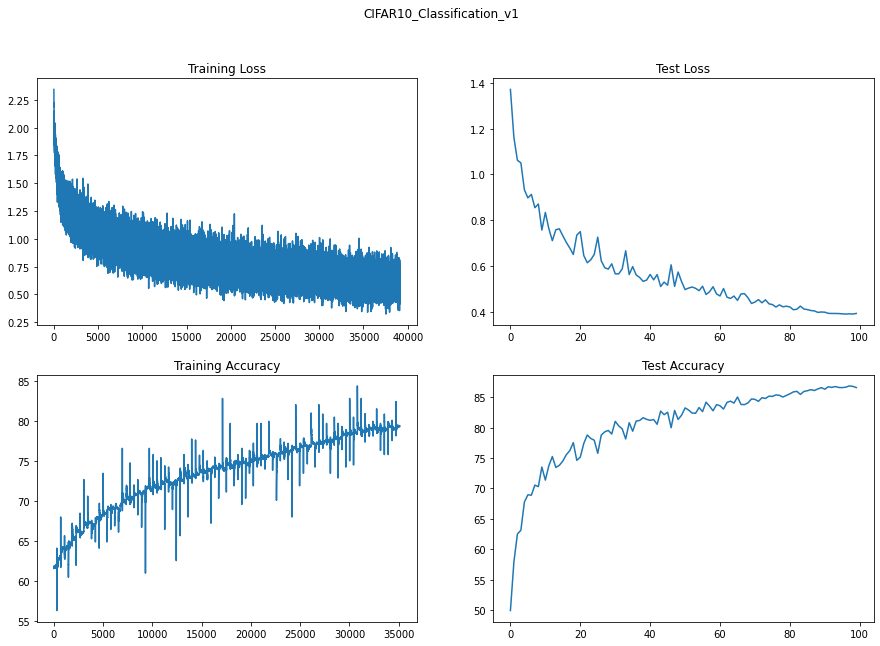

In [9]:
model, train_losses, test_losses, train_acc, test_accs = train_model("CIFAR10_Classification_v1", device,
                                                                     MAX_LR = 0.2, EPOCHS = 100,
                                                                     train_batch_size = 128,
                                                                     val_batch_size = 128)

# Misclassified Images

Files already downloaded and verified
Files already downloaded and verified


/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integ

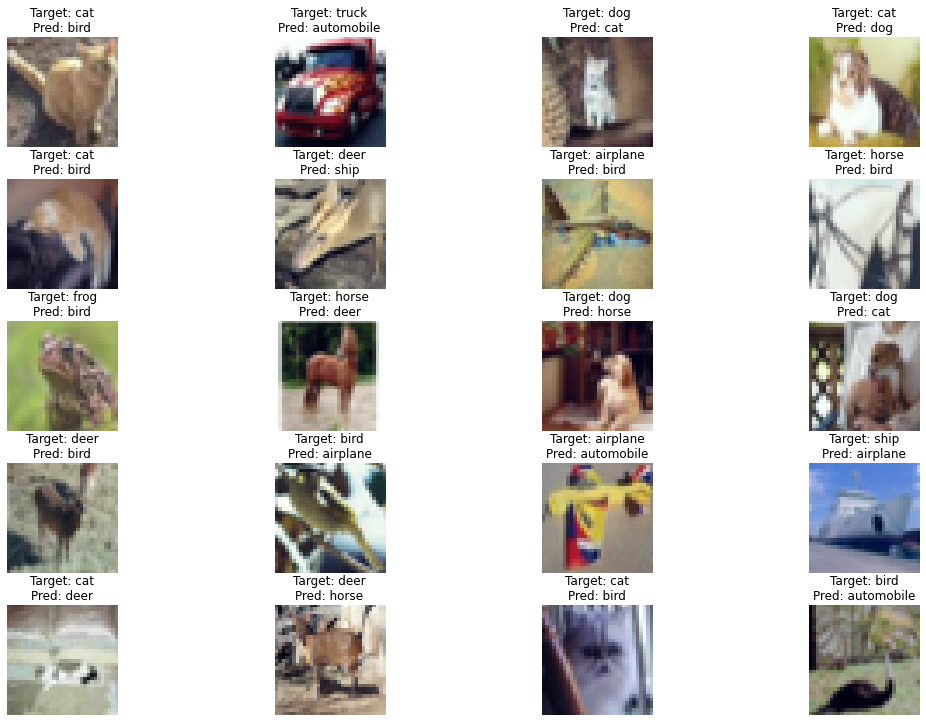

In [10]:
misclassified(model, "CIFAR10_Classification_v1", classes)